In [125]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt2
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  
import graphviz
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from ggplot import *
import pydotplus

from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import metrics  
from sklearn.model_selection import train_test_split  


In [126]:
# Import data

mp  = pd.read_csv('/Users/Felicia/Documents/Felicia Zhang/Felicia/Princeton/ConsultingClub/Mindprint/Mindprint_ScaledScores_YesCombo_111518.csv')
mp.set_index('customer_id', inplace=True)

print('Data size:',len(mp), 'rows') 

Data size: 236 rows


In [127]:
mp.head()

,age,SM_Sz,SM_SCORE,VMEM_Az,VMEM_Sz,VMEM_efficiency,VMEM_SCORE,ABF_Az,ABF_Sz,ABF_efficiency,...,DEPRESSION,ACTversion,EngRaw,MathRaw,ReadingRaw,ScienceRaw,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore
customer_id,,,,,,,,,,,,,,,,,,,,,
512,15,1.0190,medium_strength,0.6298,0.3895,0.50965,high_expected,-0.0704,-0.1611,-0.11575,...,0,70G,67,44.0,36.0,26.0,29,26.0,31.0,24.0
512,15,1.0190,medium_strength,0.6298,0.3895,0.50965,high_expected,-0.0704,-0.1611,-0.11575,...,0,Combo,56,33.0,54.0,46.0,18,16.0,21.0,19.0
513,16,0.7039,high_expected,0.9644,1.1184,1.04140,high_expected,1.0407,1.0965,1.06860,...,0,71E,59,36.0,29.0,15.0,26,23.0,25.0,18.0
517,17,1.7537,high_strength,0.6250,1.0837,0.85435,high_expected,0.9616,0.2867,0.62415,...,0,71A,70,44.0,35.0,27.0,32,27.0,31.0,24.0
677,16,0.6158,high_expected,-0.0539,0.6653,0.30570,medium_expected,-1.9930,0.8253,-0.58385,...,0,71C,51,23.0,30.0,18.0,22,17.0,27.0,19.0


In [128]:
# Label students who received extra time: 2507 (don't have data), 2421, 4499, 6150, 517, 2010, 2948, 6171, 5866, 4967, 2720, 1872, 6808
mp['ExtraTime'] = 0

mp.loc[2421, 'ExtraTime'] = 1
mp.loc[4499, 'ExtraTime'] = 1
mp.loc[6150, 'ExtraTime'] = 1
mp.loc[517, 'ExtraTime'] = 1
mp.loc[2010, 'ExtraTime'] = 1
mp.loc[2948, 'ExtraTime'] = 1
mp.loc[6171, 'ExtraTime'] = 1
mp.loc[5866, 'ExtraTime'] = 1
mp.loc[4967, 'ExtraTime'] = 1
mp.loc[2720, 'ExtraTime'] = 1
mp.loc[1872, 'ExtraTime'] = 1
mp.loc[6808, 'ExtraTime'] = 1

print('Number of students who received extra time:',len(mp.loc[mp['ExtraTime'] == 1]))

Number of students who received extra time: 14


In [129]:
# Replace outlier Mindprint scores (accuracy scores with < -2 with NAN)
# 1901: WM_Az, 5143: ATT_Az, 1902: ATT_Az, 6381: ATT_Az

print(mp.loc[1901, 'WM_Az'], mp.loc[5143, 'ATT_Az'], mp.loc[1902, 'ATT_Az'], mp.loc[6381, 'ATT_Az'])

mp.loc[1901, 'WM_Az'] = -2
mp.loc[5143, 'ATT_Az'] = -2
mp.loc[1902, 'ATT_Az'] = -2
mp.loc[6381, 'ATT_Az'] = -2

print(mp.loc[1901, 'WM_Az'], mp.loc[5143, 'ATT_Az'], mp.loc[1902, 'ATT_Az'], mp.loc[6381, 'ATT_Az'])

-6.8829 -4.2585 -4.2585 customer_id
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
Name: ATT_Az, dtype: float64
-2.0 -2.0 -2.0 customer_id
6381   -2.0
6381   -2.0
6381   -2.0
6381   -2.0
6381   -2.0
6381   -2.0
6381   -2.0
Name: ATT_Az, dtype: float64


In [130]:
# Remove students that having missing ACT subject scores

print('Number of students with missing ACT subject scores:',len(mp) - len(mp.dropna(subset=['EngScaledScore','MathScaledScore','ReadingScaledScore','ScienceScaledScore']))) 
mp = mp.dropna(subset=['EngScaledScore','MathScaledScore','ReadingScaledScore','ScienceScaledScore']) 

Number of students with missing ACT subject scores: 5


In [132]:
# Calculate descriptive statistics

mp.describe().round(1)

,age,SM_Sz,VMEM_Az,VMEM_Sz,VMEM_efficiency,ABF_Az,ABF_Sz,ABF_efficiency,LAN_Az,LAN_Sz,...,DEPRESSION,EngRaw,MathRaw,ReadingRaw,ScienceRaw,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore,ExtraTime
count,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,...,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0
mean,16.2,0.8,0.2,0.3,0.3,0.2,0.4,0.3,0.5,0.1,...,0.1,56.4,40.3,32.1,30.4,23.4,23.3,23.3,22.6,0.1
std,0.8,0.6,0.7,0.6,0.5,1.1,0.9,0.8,0.5,0.8,...,0.4,13.0,11.4,16.0,15.5,5.2,4.5,5.1,3.8,0.2
min,14.0,-1.7,-3.1,-1.6,-1.6,-3.9,-3.7,-3.2,-1.4,-3.4,...,0.0,24.0,14.0,8.0,6.0,10.0,15.0,9.0,10.0,0.0
25%,16.0,0.4,-0.1,-0.0,-0.1,-0.2,0.0,0.0,0.2,-0.3,...,0.0,49.0,34.0,22.0,21.0,20.0,19.5,20.0,20.0,0.0
50%,16.0,0.9,0.6,0.4,0.4,0.5,0.6,0.4,0.6,0.2,...,0.0,56.0,39.0,27.0,26.0,23.0,24.0,23.0,23.0,0.0
75%,17.0,1.2,0.6,0.8,0.7,0.9,0.9,0.8,1.0,0.7,...,0.0,64.5,46.0,35.0,32.0,27.0,27.0,27.0,25.0,0.0
max,21.0,2.0,1.0,1.5,1.2,2.5,3.4,1.8,1.1,1.4,...,2.0,95.0,87.0,96.0,100.0,35.0,35.0,34.0,36.0,1.0


In [133]:
# Only want the scaled subject scores

scores = mp.iloc[:,[-5,-4,-3,-2,-1]]
scores['TotalScore'] = scores.mean(axis=1).astype(int)
scores.head()

/Users/Felicia/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore,ExtraTime,TotalScore
customer_id,,,,,,
512,29,26.0,31.0,24.0,0,22
512,18,16.0,21.0,19.0,0,14
513,26,23.0,25.0,18.0,0,18
517,32,27.0,31.0,24.0,1,23
677,22,17.0,27.0,19.0,0,17


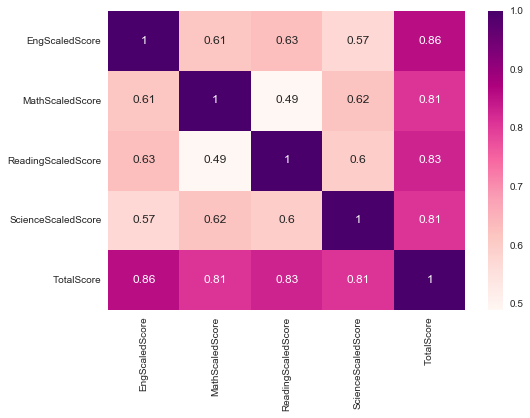

In [134]:
# Heatmap
# remove extratime column for the heatmap
scores2 = scores.drop('ExtraTime', 1)

fig = sns.heatmap(scores2.corr(),annot=True, cmap='RdPu')
plt2.show()

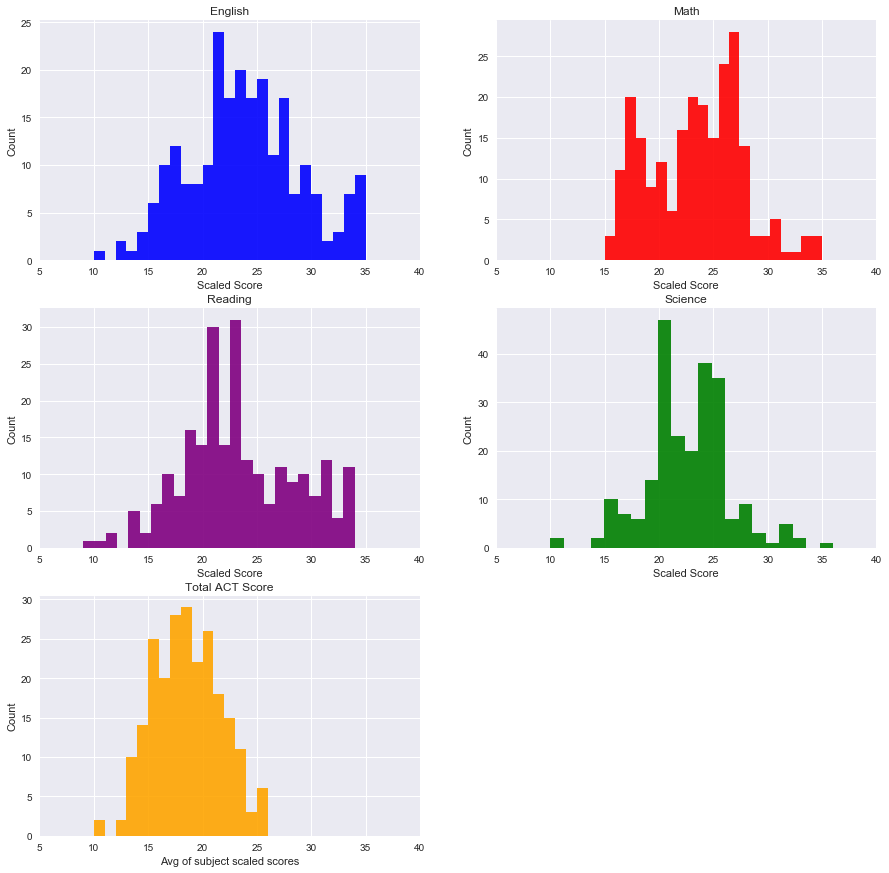

In [135]:
# Plot distribution of subject scores
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(321)
ax2 = fig1.add_subplot(322)
ax3 = fig1.add_subplot(323)
ax4 = fig1.add_subplot(324)
ax5 = fig1.add_subplot(325)

x = scores.loc[:,'EngScaledScore']
n, bins, patches = ax1.hist(x, len(scores.EngScaledScore.unique()), facecolor='blue', alpha=0.9)
ax1.set_title("English")
ax1.set_ylabel("Count")
ax1.set_xlabel("Scaled Score")
ax1.set_xlim(5,40,5)

x = scores.loc[:,'MathScaledScore']
n, bins, patches = ax2.hist(x, len(scores.MathScaledScore.unique()), facecolor='red', alpha=0.9)
ax2.set_title("Math")
ax2.set_ylabel("Count")
ax2.set_xlabel("Scaled Score")
ax2.set_xlim(5,40,5)

x = scores.loc[:,'ReadingScaledScore']
n, bins, patches = ax3.hist(x, len(scores.ReadingScaledScore.unique()), facecolor='purple', alpha=0.9)
ax3.set_title("Reading")
ax3.set_ylabel("Count")
ax3.set_xlabel("Scaled Score")
ax3.set_xlim(5,40,5)

x = scores.loc[:,'ScienceScaledScore']
n, bins, patches = ax4.hist(x, len(scores.ScienceScaledScore.unique()), facecolor='green', alpha=0.9)
ax4.set_title("Science")
ax4.set_ylabel("Count")
ax4.set_xlabel("Scaled Score")
ax4.set_xlim(5,40,5)

x = scores.loc[:,'TotalScore']
n, bins, patches = ax5.hist(x, len(scores.TotalScore.unique()), facecolor='orange', alpha=0.9)
ax5.set_title("Total ACT Score")
ax5.set_ylabel("Count")
ax5.set_xlabel("Avg of subject scaled scores")
ax5.set_xlim(5,40,5)

plt.show()

# Tree Model

In [136]:
###### Plan ######
# Use regression tree, 
# combine speed, accuracy and efficiency together
# increase depth to 4+
# run model with and without students who received extra time

In [137]:
# drop processing speed
mp = mp.drop('PROCESSING_SPEED_Sz', axis=1) 

## Reading - All subjects

In [138]:
# load data
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = scores.loc[:, 'ReadingScaledScore'].copy()
    
# set cv to leaveOneOut
loo = cross_validation.LeaveOneOut(len(y))

# trying to determine number of tree branch
for depth in range(1,10):    
    # set up the tree 
    regressor = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=10)  
    
    # evaluate tree using leaveOneOut cv
    accscore = np.mean(cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=loo))
    
    # print MSE
    print('tree depth:',depth,'Neg Mean Squared Error:', accscore)  

# cv outputs the negative of the MSE because it tries to maximize the accuracy score. 
# So the best score (smallest MSE magnitude) is always the largest


tree depth: 1 Neg Mean Squared Error: -22.9918698407
tree depth: 2 Neg Mean Squared Error: -26.3156209406
tree depth: 3 Neg Mean Squared Error: -28.3283632231
tree depth: 4 Neg Mean Squared Error: -25.740044912
tree depth: 5 Neg Mean Squared Error: -26.8492583992
tree depth: 6 Neg Mean Squared Error: -27.3595855179
tree depth: 7 Neg Mean Squared Error: -28.0950684119
tree depth: 8 Neg Mean Squared Error: -27.848895396
tree depth: 9 Neg Mean Squared Error: -27.6488262671


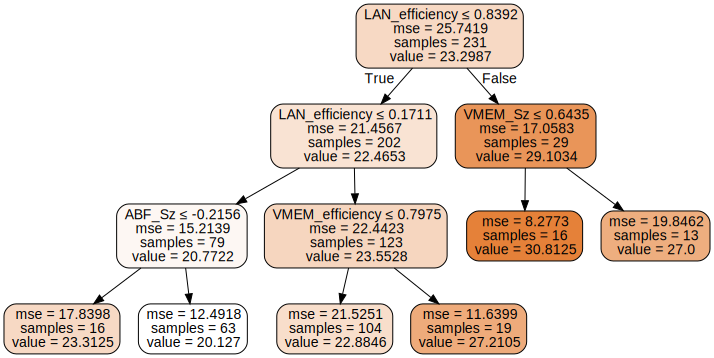

In [139]:
# Build final tree
foo = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=10)
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Reading - Removed extra time students

In [140]:
# load data
# drop students who received extra time
mp2 = mp[mp.ExtraTime != 1]
scores2 = scores[scores.ExtraTime != 1]

X = mp2.loc[:, mp2.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = scores2.loc[:, 'ReadingScaledScore'].copy()

# set cv to leaveOneOut
loo = cross_validation.LeaveOneOut(len(y))

# trying to determine number of tree branch
for depth in range(1,10):    
    # set up the tree 
    regressor = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=10)  
    
    # evaluate tree using leaveOneOut cv
    accscore = np.mean(cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=loo))
    
    # print MSE
    print('tree depth:',depth,'Neg Mean Squared Error:', accscore)  

# cv outputs the negative of the MSE because it tries to maximize the accuracy score. 
# So the best score (smallest MSE magnitude) is always the largest

tree depth: 1 Neg Mean Squared Error: -21.9124183295
tree depth: 2 Neg Mean Squared Error: -21.3864888354
tree depth: 3 Neg Mean Squared Error: -20.663969523
tree depth: 4 Neg Mean Squared Error: -22.1876610364
tree depth: 5 Neg Mean Squared Error: -23.4812878715
tree depth: 6 Neg Mean Squared Error: -23.0076746681
tree depth: 7 Neg Mean Squared Error: -23.3877787914
tree depth: 8 Neg Mean Squared Error: -23.4602273556
tree depth: 9 Neg Mean Squared Error: -23.2875489872


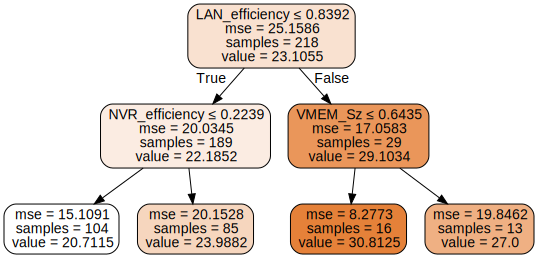

In [141]:
# Build final tree
foo = tree.DecisionTreeRegressor(max_depth=2, min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Math 

In [142]:
# load data
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = scores.loc[:, 'MathScaledScore'].copy()

# set cv to leaveOneOut
loo = cross_validation.LeaveOneOut(len(y))

# trying to determine number of tree branch
for depth in range(1,10):    
    # set up the tree 
    regressor = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=10)  
    
    # evaluate tree using leaveOneOut cv
    accscore = np.mean(cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=loo))
    
    # print MSE
    print('tree depth:',depth,'Neg Mean Squared Error:', accscore)  

# cv outputs the negative of the MSE because it tries to maximize the accuracy score. 
# So the best score (smallest MSE magnitude) is always the largest

tree depth: 1 Neg Mean Squared Error: -22.8545553511
tree depth: 2 Neg Mean Squared Error: -19.9101233964
tree depth: 3 Neg Mean Squared Error: -19.2119391232
tree depth: 4 Neg Mean Squared Error: -19.1366227718
tree depth: 5 Neg Mean Squared Error: -18.7056402786
tree depth: 6 Neg Mean Squared Error: -18.570026966
tree depth: 7 Neg Mean Squared Error: -19.1292608218
tree depth: 8 Neg Mean Squared Error: -19.0461687556
tree depth: 9 Neg Mean Squared Error: -19.0912133157


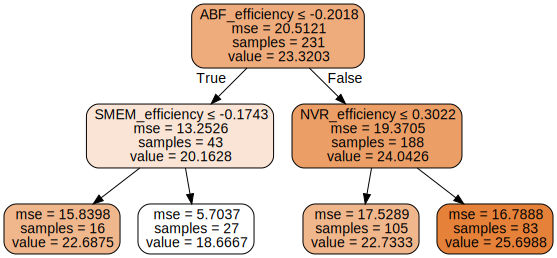

In [143]:
# Build final tree
foo = tree.DecisionTreeRegressor(max_depth=2, min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Math - Removed extra time students

In [144]:
# load data
# drop students who received extra time
mp2 = mp[mp.ExtraTime != 1]
scores2 = scores[scores.ExtraTime != 1]

X = mp2.loc[:, mp2.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = scores2.loc[:, 'MathScaledScore'].copy()

# set cv to leaveOneOut
loo = cross_validation.LeaveOneOut(len(y))

# trying to determine number of tree branch
for depth in range(1,10):    
    # set up the tree 
    regressor = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=10)  
    
    # evaluate tree using leaveOneOut cv
    accscore = np.mean(cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=loo))
    
    # print MSE
    print('tree depth:',depth,'Neg Mean Squared Error:', accscore)  

# cv outputs the negative of the MSE because it tries to maximize the accuracy score. 
# So the best score (smallest MSE magnitude) is always the largest

tree depth: 1 Neg Mean Squared Error: -18.0004937536
tree depth: 2 Neg Mean Squared Error: -21.1701845544
tree depth: 3 Neg Mean Squared Error: -20.7181247192
tree depth: 4 Neg Mean Squared Error: -22.0651966828
tree depth: 5 Neg Mean Squared Error: -21.3108964741
tree depth: 6 Neg Mean Squared Error: -21.1327291333
tree depth: 7 Neg Mean Squared Error: -21.0130839637
tree depth: 8 Neg Mean Squared Error: -20.7819410308
tree depth: 9 Neg Mean Squared Error: -20.7594270983


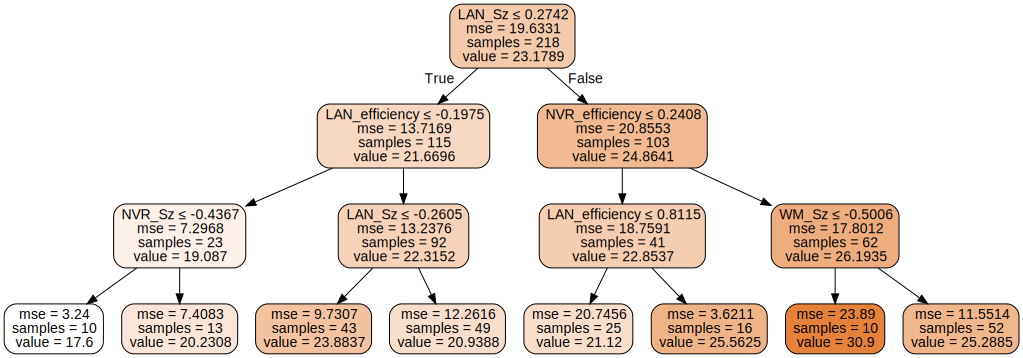

In [145]:
# Build final tree
foo = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Science 

In [146]:
# load data
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = scores.loc[:, 'ScienceScaledScore'].copy()

# set cv to leaveOneOut
loo = cross_validation.LeaveOneOut(len(y))

# trying to determine number of tree branch
for depth in range(1,10):    
    # set up the tree 
    regressor = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=10)  
    
    # evaluate tree using leaveOneOut cv
    accscore = np.mean(cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=loo))
    
    # print MSE
    print('tree depth:',depth,'Neg Mean Squared Error:', accscore)  

# cv outputs the negative of the MSE because it tries to maximize the accuracy score. 
# So the best score (smallest MSE magnitude) is always the largest

tree depth: 1 Neg Mean Squared Error: -15.7466048194
tree depth: 2 Neg Mean Squared Error: -17.7471117392
tree depth: 3 Neg Mean Squared Error: -18.2318396448
tree depth: 4 Neg Mean Squared Error: -17.3784975211
tree depth: 5 Neg Mean Squared Error: -17.323086638
tree depth: 6 Neg Mean Squared Error: -17.3596709085
tree depth: 7 Neg Mean Squared Error: -16.968788338
tree depth: 8 Neg Mean Squared Error: -17.2490664187
tree depth: 9 Neg Mean Squared Error: -16.9953756294


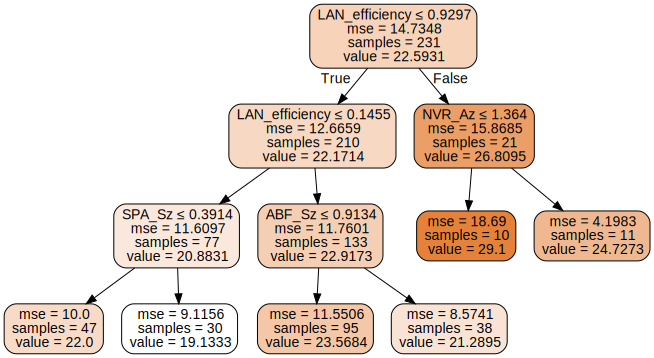

In [147]:
# Build final tree
foo = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Science - Removed extra time students

In [148]:
# load data
# drop students who received extra time
mp2 = mp[mp.ExtraTime != 1]
scores2 = scores[scores.ExtraTime != 1]

X = mp2.loc[:, mp2.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = scores2.loc[:, 'ScienceScaledScore'].copy()

# set cv to leaveOneOut
loo = cross_validation.LeaveOneOut(len(y))

# trying to determine number of tree branch
for depth in range(1,10):    
    # set up the tree 
    regressor = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=10)  
    
    # evaluate tree using leaveOneOut cv
    accscore = np.mean(cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=loo))
    
    # print MSE
    print('tree depth:',depth,'Neg Mean Squared Error:', accscore)  

# cv outputs the negative of the MSE because it tries to maximize the accuracy score. 
# So the best score (smallest MSE magnitude) is always the largest

tree depth: 1 Neg Mean Squared Error: -14.6827675297
tree depth: 2 Neg Mean Squared Error: -15.1254896382
tree depth: 3 Neg Mean Squared Error: -14.7002535683
tree depth: 4 Neg Mean Squared Error: -14.6362395902
tree depth: 5 Neg Mean Squared Error: -14.0335282517
tree depth: 6 Neg Mean Squared Error: -14.0178271408
tree depth: 7 Neg Mean Squared Error: -14.0537406432
tree depth: 8 Neg Mean Squared Error: -13.7970325809
tree depth: 9 Neg Mean Squared Error: -13.9625508158


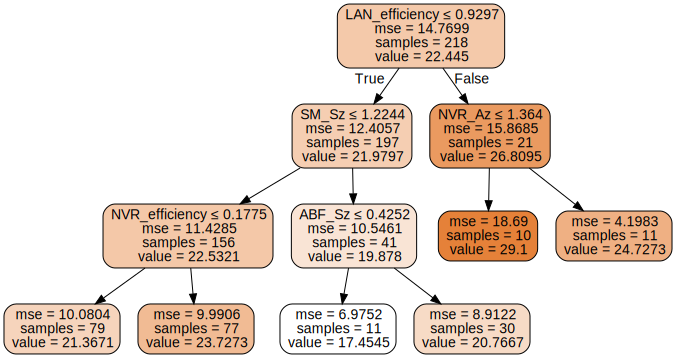

In [149]:
# Build final tree
foo = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## English

In [150]:
# load data
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = scores.loc[:, 'EngScaledScore'].copy()

# set cv to leaveOneOut
loo = cross_validation.LeaveOneOut(len(y))

# trying to determine number of tree branch
for depth in range(1,10):    
    # set up the tree 
    regressor = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=10)  
    
    # evaluate tree using leaveOneOut cv
    accscore = np.mean(cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=loo))
    
    # print MSE
    print('tree depth:',depth,'Neg Mean Squared Error:', accscore)  

# cv outputs the negative of the MSE because it tries to maximize the accuracy score. 
# So the best score (smallest MSE magnitude) is always the largest

tree depth: 1 Neg Mean Squared Error: -24.6783392179
tree depth: 2 Neg Mean Squared Error: -26.7199358341
tree depth: 3 Neg Mean Squared Error: -25.8351869514
tree depth: 4 Neg Mean Squared Error: -25.5833328422
tree depth: 5 Neg Mean Squared Error: -28.4895536424
tree depth: 6 Neg Mean Squared Error: -26.9411244592
tree depth: 7 Neg Mean Squared Error: -26.1769821682
tree depth: 8 Neg Mean Squared Error: -26.3264700931
tree depth: 9 Neg Mean Squared Error: -26.9237428204


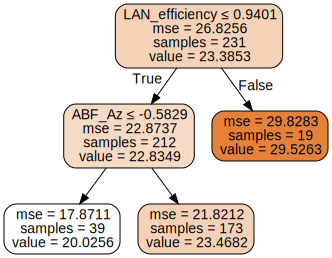

In [151]:
# Build final tree
foo = tree.DecisionTreeRegressor(max_depth=2, min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## English - Removed extra time students

In [152]:
# load data
# drop students who received extra time
mp2 = mp[mp.ExtraTime != 1]
scores2 = scores[scores.ExtraTime != 1]

X = mp2.loc[:, mp2.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = scores2.loc[:, 'EngScaledScore'].copy()

# set cv to leaveOneOut
loo = cross_validation.LeaveOneOut(len(y))

# trying to determine number of tree branch
for depth in range(1,10):    
    # set up the tree 
    regressor = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=10)  
    
    # evaluate tree using leaveOneOut cv
    accscore = np.mean(cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=loo))
    
    # print MSE
    print('tree depth:',depth,'Neg Mean Squared Error:', accscore)  

# cv outputs the negative of the MSE because it tries to maximize the accuracy score. 
# So the best score (smallest MSE magnitude) is always the largest

tree depth: 1 Neg Mean Squared Error: -24.5850695902
tree depth: 2 Neg Mean Squared Error: -24.4036314261
tree depth: 3 Neg Mean Squared Error: -25.2319169682
tree depth: 4 Neg Mean Squared Error: -23.7432556116
tree depth: 5 Neg Mean Squared Error: -25.5022328988
tree depth: 6 Neg Mean Squared Error: -23.8765713406
tree depth: 7 Neg Mean Squared Error: -23.8048728076
tree depth: 8 Neg Mean Squared Error: -23.9581774675
tree depth: 9 Neg Mean Squared Error: -23.6444464018


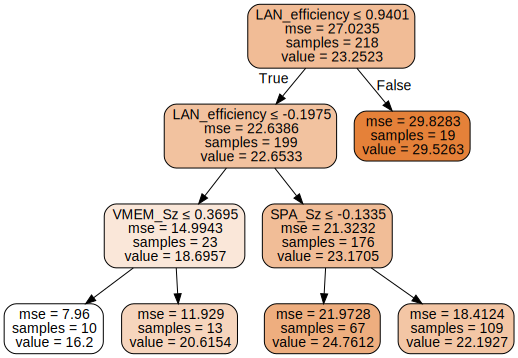

In [153]:
# Build final tree
foo = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph